In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix


iris=datasets.load_iris()
X=iris.data  
y=iris.target 
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.8, random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
svm_model = SVC(kernel='linear',random_state=42)  
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
recall=recall_score(y_test, y_pred, average='macro')
f1=f1_score(y_test, y_pred, average='macro')
conf_matrix=confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.97
Recall: 0.97
F1 Score: 0.97
Confusion Matrix:
[[43  0  0]
 [ 0 36  3]
 [ 0  0 38]]


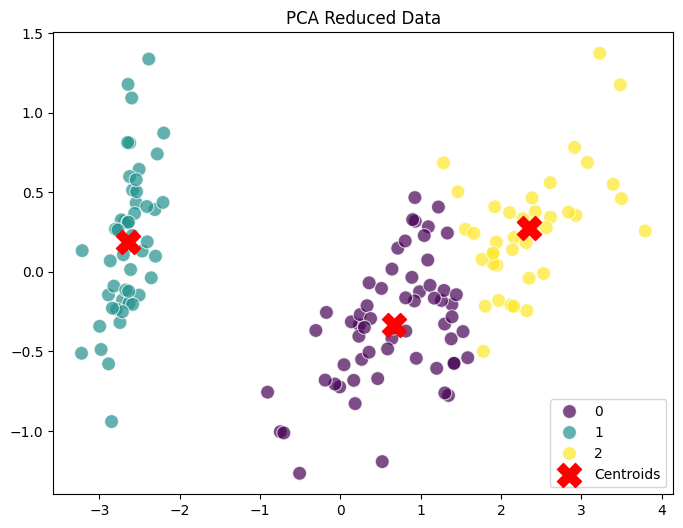

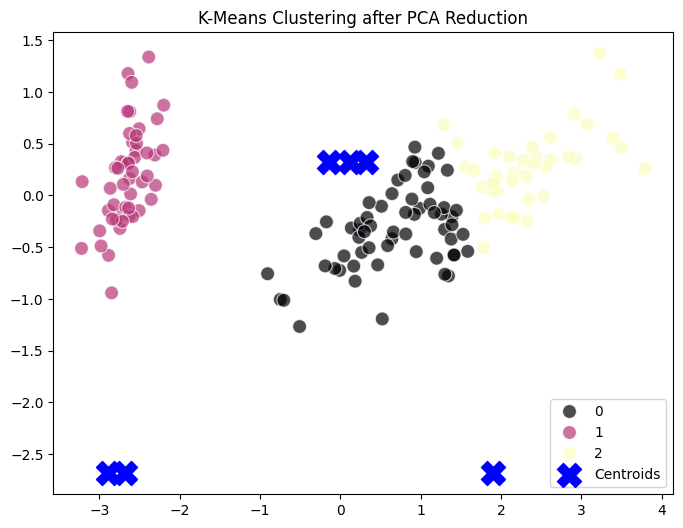

Silhouette Score before PCA:0.55
Silhouette Score after PCA: 0.60
For n_clusters=2, the average silhouette_score is : 0.68
For n_clusters=3, the average silhouette_score is : 0.55
For n_clusters=4, the average silhouette_score is : 0.50
For n_clusters=5, the average silhouette_score is : 0.46
For n_clusters=6, the average silhouette_score is : 0.34


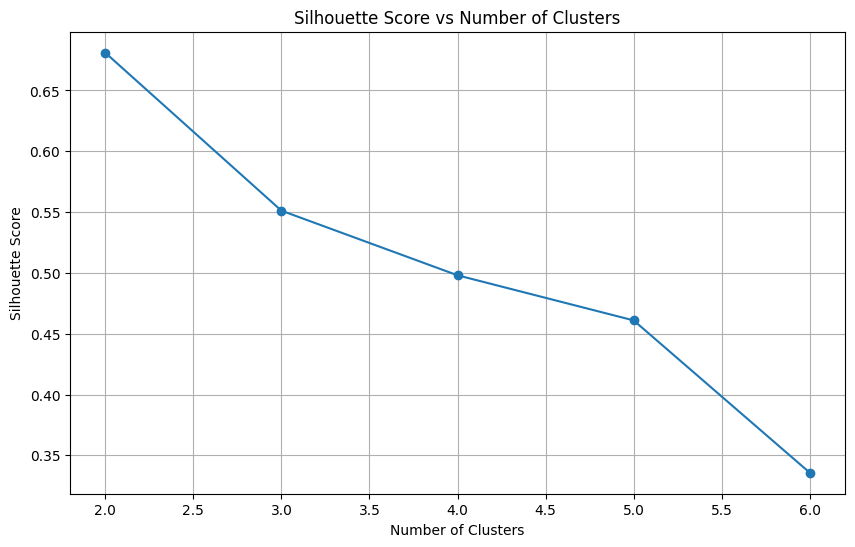

In [5]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


iris=datasets.load_iris()
X=iris.data
kmeans=KMeans(n_clusters=3,random_state=0)
y_kmeans=kmeans.fit_predict(X)
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue=y_kmeans,palette='viridis',s=100,alpha=0.7)
centers_pca=pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:,0],centers_pca[:,1],s=300,c='red',marker='X',label='Centroids')
plt.title('PCA Reduced Data')
plt.legend()
plt.show()
X_pca_before_clustering=PCA(n_components=2).fit_transform(X)
kmeans_after_pca=KMeans(n_clusters=3,random_state=0)
y_kmeans_after_pca=kmeans_after_pca.fit_predict(X_pca_before_clustering)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_before_clustering[:,0],y=X_pca_before_clustering[:,1],hue=y_kmeans_after_pca,palette='magma',s=100,alpha=0.7)
centers_pca_after=X_pca_before_clustering[kmeans_after_pca.cluster_centers_.astype(int)]
plt.scatter(centers_pca_after[:,0], centers_pca_after[:,1],s=300,c='blue',marker='X',label='Centroids')
plt.title('K-Means Clustering after PCA Reduction')
plt.legend()
plt.show()
silhouette_avg=silhouette_score(X,y_kmeans)
print(f"Silhouette Score before PCA:{silhouette_avg:.2f}")
silhouette_avg_after_pca=silhouette_score(X_pca_before_clustering,y_kmeans_after_pca)
print(f"Silhouette Score after PCA: {silhouette_avg_after_pca:.2f}")
range_n_clusters=[2,3,4,5,6]
silhouette_scores=[]
for n_clusters in range_n_clusters:
    clusterer=KMeans(n_clusters=n_clusters,random_state=0)
    cluster_labels=clusterer.fit_predict(X)
    silhouette_avg=silhouette_score(X,cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters={n_clusters}, the average silhouette_score is : {silhouette_avg:.2f}")
plt.figure(figsize=(10,6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()